<a href="https://colab.research.google.com/github/renaldoaluska/pba2025gasal/blob/main/PBA_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5026221144

Alfa Renaldo Aluska

PBA GASAL 2025

In [18]:
# Nnama file CSV
nama_file = 'df_transjog_clean.csv'

# Load CSV ke DataFrame bernama df_transjog
df_transjog_clean = pd.read_csv(nama_file)

# Opsional: Cek 5 baris pertama untuk mastiin datanya bener
print(df_transjog_clean.head())

                                             content  score  thumbsUpCount  \
0             aplikasi berguna, tapi terkadang error      5              0   
1         membantu pulang sekolah dan menghemat uang      5              0   
2  aplikasinya ringan tapi sebaiknya metode pemba...      5              0   
3                                                oke      5              0   
4                                              bagus      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  \
0                2.3.7  2025-10-11 10:45:51          NaN       NaN   
1                2.3.7  2025-10-10 12:01:18          NaN       NaN   
2                  NaN  2025-10-10 06:50:15          NaN       NaN   
3                2.3.7  2025-10-06 03:28:55          NaN       NaN   
4                2.3.5  2025-10-01 13:13:57          NaN       NaN   

                                     content_cleaned  \
0              aplikasi berguna tapi terkadang error  

# EDA UNTUK LABELLING

### Distribusi basic

Jumlah data: (344, 13)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   content                    343 non-null    object
 1   score                      344 non-null    int64 
 2   thumbsUpCount              344 non-null    int64 
 3   reviewCreatedVersion       273 non-null    object
 4   at                         344 non-null    object
 5   replyContent               13 non-null     object
 6   repliedAt                  13 non-null     object
 7   content_cleaned            343 non-null    object
 8   content_cleaned_stopwords  343 non-null    object
 9   tokens                     344 non-null    object
 10  clean_tokens               344 non-null    object
 11  stemmed_tokens             344 non-null    object
 12  final_text                 343 non-null    object
dtypes: int64(2), object(11)
mem

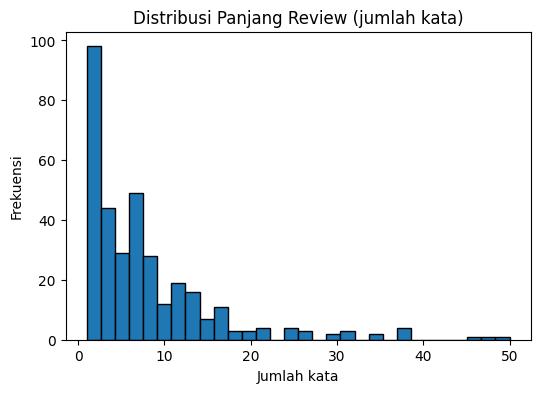

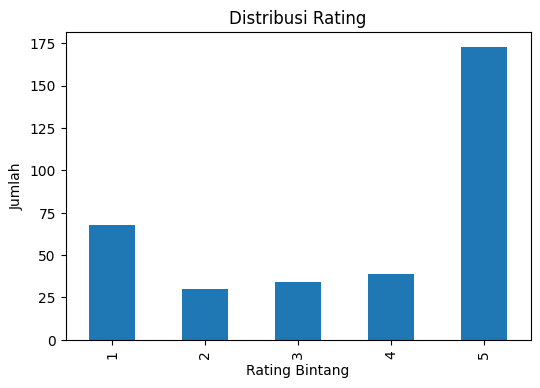

In [19]:
# EDA Basic ------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# cek ukuran data
print("Jumlah data:", df_transjog_clean.shape)
print("\nInfo dataset:")
print(df_transjog_clean.info())
print("\nCek missing value:")
print(df_transjog_clean.isnull().sum())

# distribusi panjang teks (jumlah kata per review)
df_transjog_clean["text_length"] = df_transjog_clean["final_text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(6,4))
df_transjog_clean["text_length"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribusi Panjang Review (jumlah kata)")
plt.xlabel("Jumlah kata")
plt.ylabel("Frekuensi")
plt.show()

# distribusi rating
plt.figure(figsize=(6,4))
df_transjog_clean["score"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribusi Rating")
plt.xlabel("Rating Bintang")
plt.ylabel("Jumlah")
plt.show()



### Label positif/negatif/netral


Contoh data setelah diberi label:
                                          final_text  score sentiment
0                      aplikasi guna terkadang error      5  Positive
1                    bantu pulang sekolah hemat uang      5  Positive
2  aplikasi ringan metode bayar lengkap dg transf...      5  Positive
3                                                oke      5  Positive
4                                              bagus      5  Positive

Jumlah per label sentiment:
sentiment
Positive    212
Negative     98
Neutral      34
Name: count, dtype: int64


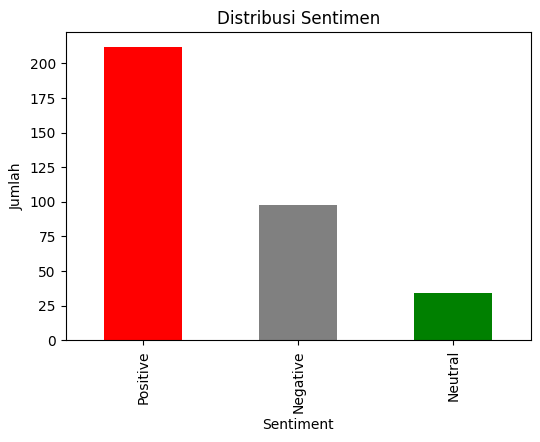

In [20]:
# ---------------- Tambah label sentimen ----------------
def label_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df_transjog_clean["sentiment"] = df_transjog_clean["score"].apply(label_sentiment)

print("\nContoh data setelah diberi label:")
print(df_transjog_clean[["final_text", "score", "sentiment"]].head())

# hitung total per label
sentiment_counts = df_transjog_clean["sentiment"].value_counts()
print("\nJumlah per label sentiment:")
print(sentiment_counts)

# distribusi label sentimen
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["red","gray","green"])
plt.title("Distribusi Sentimen")
plt.xlabel("Sentiment")
plt.ylabel("Jumlah")
plt.show()


### CSV ada label

In [21]:
# rename kolom sentiment jadi clean_label
df_transjog_clean = df_transjog_clean.rename(columns={"sentiment": "score_label"})

# simpan ke csv baru
df_transjog_clean.to_csv("df_transjog_clean_label.csv", index=False)

print("CSV baru berhasil dibuat: df_transjog_clean_label.csv")
print(df_transjog_clean.head())


CSV baru berhasil dibuat: df_transjog_clean_label.csv
                                             content  score  thumbsUpCount  \
0             aplikasi berguna, tapi terkadang error      5              0   
1         membantu pulang sekolah dan menghemat uang      5              0   
2  aplikasinya ringan tapi sebaiknya metode pemba...      5              0   
3                                                oke      5              0   
4                                              bagus      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  \
0                2.3.7  2025-10-11 10:45:51          NaN       NaN   
1                2.3.7  2025-10-10 12:01:18          NaN       NaN   
2                  NaN  2025-10-10 06:50:15          NaN       NaN   
3                2.3.7  2025-10-06 03:28:55          NaN       NaN   
4                2.3.5  2025-10-01 13:13:57          NaN       NaN   

                                     content_cleaned  \


# FEATURE ENGINEERING

### Bag of Words (BOW)

Shape BoW: (344, 904)
Unique Words: ['ab' 'acu' 'ada' 'adat' 'adl' 'adu' 'agam' 'ahmad' 'ajar' 'ak' 'akses'
 'aktivitas' 'akun' 'akurat' 'akutat' 'alaikum' 'alam' 'alamat' 'alas'
 'alhamdulillah']


,ab,acu,ada,adat,adl,adu,agam,ahmad,ajar,ak,...,wib,wifi,wisata,wkt,wkwk,wojo,work,worth,wr,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



20 kata paling sering muncul:
bus            162
aplikasi        91
bantu           66
rute            52
transjogja      50
halte           47
jalur           37
baik            32
bagus           32
terimakasih     28
jam             27
banget          27
tunggu          26
error           25
tolong          25
jalan           23
posisi          20
mohon           18
guna            17
lokasi          16
dtype: int64


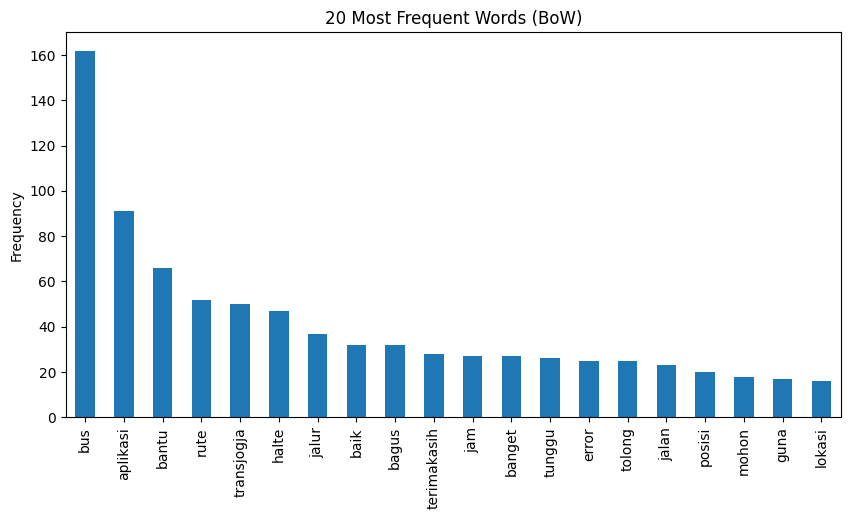

In [16]:
# ==================================
# Bag of Words setelah Lemmatization
# ==================================

from sklearn.feature_extraction.text import CountVectorizer

# misal kamu punya hasil preprocessing (udah lower, stopwords gone, lemma)
# simpen di list/series -> corpus
corpus = df_transjog_clean["final_text"].astype(str).tolist()

# asumsinya 'corpus' udah berisi list teks hasil preprocessing (udah lowercase + lemmatize dll)
cv = CountVectorizer()
X_bow = cv.fit_transform(corpus)

# ubah jadi dataframe biar gampang dibaca
bow_df = pd.DataFrame(X_bow.toarray(), columns=cv.get_feature_names_out())

print("Shape BoW:", bow_df.shape)
print("Unique Words:", cv.get_feature_names_out()[:20])  # tampilkan 20 kata unik pertama

# tampilkan 5 row pertama
display(bow_df.head())

# ---------------- EDA kata paling sering ------------------
word_freq = bow_df.sum(axis=0).sort_values(ascending=False)

print("\n20 kata paling sering muncul:")
print(word_freq.head(20))

# plot top 20 kata
plt.figure(figsize=(10,5))
word_freq.head(20).plot(kind='bar')
plt.title("20 Most Frequent Words (BoW)")
plt.ylabel("Frequency")
plt.show()



## TF-IDF

Shape TF-IDF: (344, 904)


,ab,acu,ada,adat,adl,adu,agam,ahmad,ajar,ak,...,wib,wifi,wisata,wkt,wkwk,wojo,work,worth,wr,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.228244,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Sentence 1
  Sum of TF-IDF scores: 1.9224522283299592
  Number of words: 4
  Average TF-IDF score: 0.4806130570824898

Sentence 2
  Sum of TF-IDF scores: 2.166485615327136
  Number of words: 5
  Average TF-IDF score: 0.4332971230654272

Sentence 3
  Sum of TF-IDF scores: 4.266860550010064
  Number of words: 20
  Average TF-IDF score: 0.21334302750050319

Sentence 4
  Sum of TF-IDF scores: 1.0
  Number of words: 1
  Average TF-IDF score: 1.0

Sentence 5
  Sum of TF-IDF scores: 1.0
  Number of words: 1
  Average TF-IDF score: 1.0

20 kata dengan total TF-IDF tertinggi:
bantu       25.384740
bus         24.115289
aplikasi    17.838121
bagus       16.592714
baik        11.548665
dtype: float64


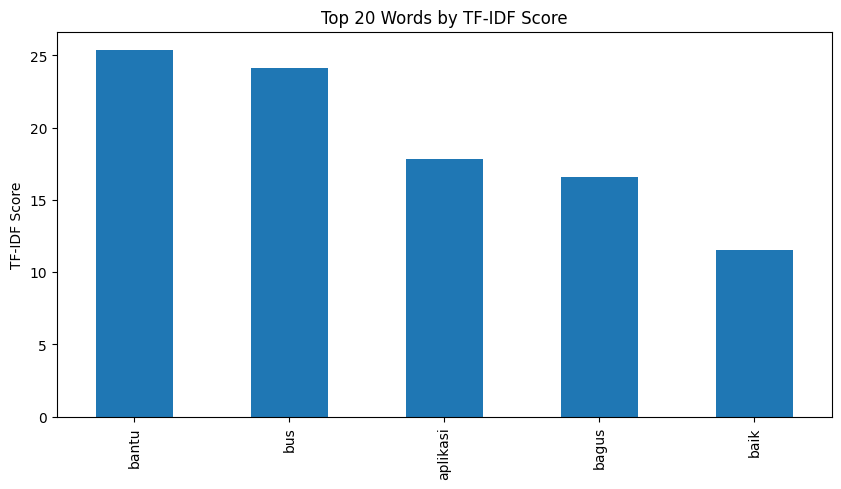

In [17]:
# TF-IDF ----------------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

# bikin TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)

# ubah ke dataframe biar rapi
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print("Shape TF-IDF:", tfidf_df.shape)
display(tfidf_df.head())

# ---------------- Analisis per kalimat (sample 5) ----------------
sample_df = tfidf_df.head(5)   # ambil 5 kalimat pertama

for i, row in enumerate(sample_df.values):
    sum_score = row.sum()
    n_words = (row > 0).sum()   # jumlah kata non-zero di kalimat
    avg_score = sum_score / n_words if n_words > 0 else 0

    print(f"Sentence {i+1}")
    print(f"  Sum of TF-IDF scores: {sum_score}")
    print(f"  Number of words: {n_words}")
    print(f"  Average TF-IDF score: {avg_score}\n")


# ---------------- Top kata berdasarkan skor total TF-IDF ----------------
word_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

print("20 kata dengan total TF-IDF tertinggi:")
print(word_tfidf.head(5))

plt.figure(figsize=(10,5))
word_tfidf.head(5).plot(kind='bar')
plt.title("Top 20 Words by TF-IDF Score")
plt.ylabel("TF-IDF Score")
plt.show()
